In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


# **Projet DeepLearning**

## 1 Context : 
Le modèle qui sera utilisé ici aura pour but de répondre a une problématique d'aggregateur d'annonce immobilière.

Le modèle aura donc pour but de reconnaître :

1.   Des images de bien immobilier
2.   Des images de pièce de bien immobilier

Cela dans le but final de moderer les annonces déposer sur certains aggregateur d'annonce immobilière ouvert au particulier comme aux professionnels.



In [ ]:
!pip install -Uqq fastbook
import fastbook

     |████████████████████████████████| 720 kB 5.1 MB/s 
     |████████████████████████████████| 46 kB 3.8 MB/s 
     |████████████████████████████████| 1.2 MB 18.6 MB/s 
     |████████████████████████████████| 189 kB 54.7 MB/s 
     |████████████████████████████████| 56 kB 4.0 MB/s 
     |████████████████████████████████| 51 kB 289 kB/s 


In [ ]:
from fastai.vision.all import*
from fastbook import*
from fastai import dataset


In [ ]:
path = Path('drive/MyDrive/Colab Notebooks/Datasets/Immo')

In [ ]:
path.ls()

(#4) [Path('drive/MyDrive/Colab Notebooks/Datasets/Immo/kitchen'),Path('drive/MyDrive/Colab Notebooks/Datasets/Immo/frontal'),Path('drive/MyDrive/Colab Notebooks/Datasets/Immo/bedroom'),Path('drive/MyDrive/Colab Notebooks/Datasets/Immo/bathroom')]

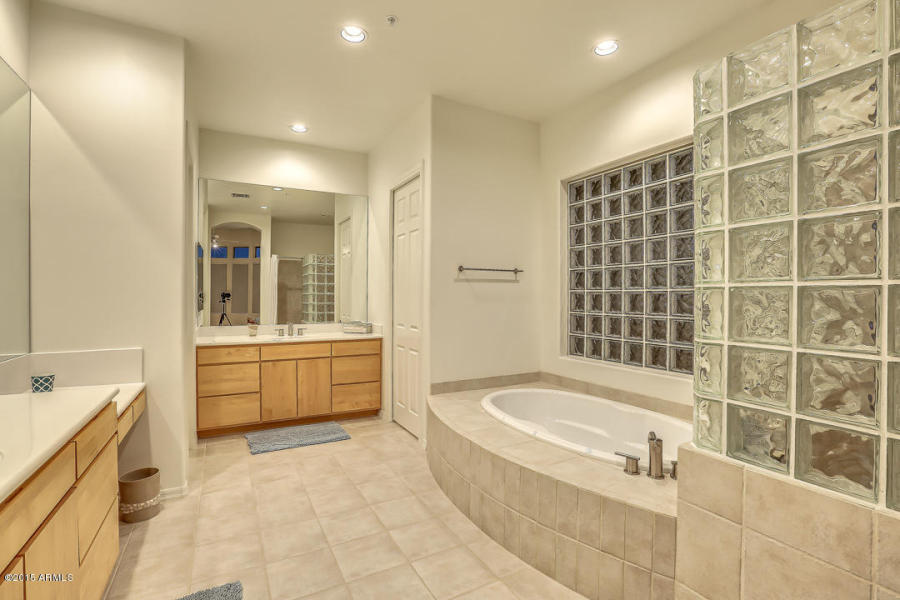

In [ ]:
import PIL

img = PIL.Image.open((path/'bathroom').ls()[0])

img

In [ ]:
def get_dls(bs,size):
    dblock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                       get_items=get_image_files,
                       get_y=parent_label,
                       splitter=RandomSplitter(valid_pct=0.2, seed=42),
                       item_tfms=Resize(128, pad_mode=PadMode.Reflection), 
                       batch_tfms=[*aug_transforms(size=size,min_scale=0.5,max_rotate=5.0, do_flip=true,mult=2),
                       Normalize.from_stats(*imagenet_stats)])
    return dblock.dataloaders(path,bs=bs)

In [ ]:
dls=get_dls(128,128)
dls.vocab

['bathroom', 'bedroom', 'frontal', 'kitchen']

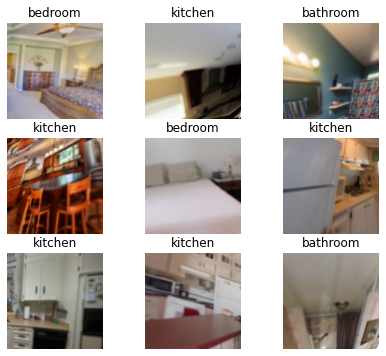

In [ ]:
dls.show_batch(nrows=3, figsize=(7,6))

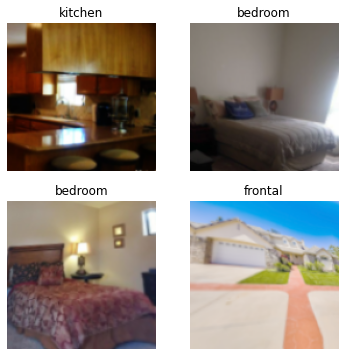

In [ ]:
dls.train.show_batch(max_n=4, nrows=2)

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,1.542583,0.261625,0.091121,04:08


epoch,train_loss,valid_loss,error_rate,time
0,0.573870,0.180259,0.053738,05:20
1,0.450312,0.159581,0.051402,05:22
2,0.385192,0.151858,0.042056,05:33


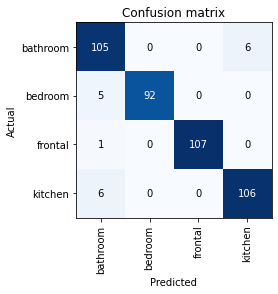

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [99]:
learn.export(fname='drive/MyDrive/Colab Notebooks/Models/ImmoPredict.pkl')
path = Path()
path.ls(file_exts='.pkl')
learn_inf = load_learner('drive/MyDrive/Colab Notebooks/Models/ImmoPredict.pkl')

In [89]:
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

In [97]:
img = PILImage.create(uploader.data[-1])
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(500,500))
out_pl

Output()

In [98]:
pred,pred_idx,probs = learn_inf.predict(img)
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred


Label(value='Prediction: kitchen; Probability: 0.9642')